In [1]:
import DataSet
import NeuralNetwork
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
objDataSet = DataSet.DataSet('DataSet.csv','TrainingSet.hdf5',100,100)
objDataSet.CreateHDF5DataSet()

32 2
Processing: 1 of 32 - 3.12% - Data\spoiled_1.jpgLabela: [1, 0]
Processing: 2 of 32 - 6.25% - Data\spoiled_2.jpgLabela: [1, 0]
Processing: 3 of 32 - 9.38% - Data\spoiled_3.jpgLabela: [1, 0]
Processing: 4 of 32 - 12.5% - Data\spoiled_4.jpgLabela: [1, 0]
Processing: 5 of 32 - 15.62% - Data\spoiled_5.jpgLabela: [1, 0]
Processing: 6 of 32 - 18.75% - Data\spoiled_6.jpgLabela: [1, 0]
Processing: 7 of 32 - 21.88% - Data\spoiled_7.jpgLabela: [1, 0]
Processing: 8 of 32 - 25.0% - Data\spoiled_8.jpgLabela: [1, 0]
Processing: 9 of 32 - 28.12% - Data\spoiled_9.jpgLabela: [1, 0]
Processing: 10 of 32 - 31.25% - Data\spoiled_10.jpgLabela: [1, 0]
Processing: 11 of 32 - 34.38% - Data\spoiled_11.jpgLabela: [1, 0]
Processing: 12 of 32 - 37.5% - Data\spoiled_12.jpgLabela: [1, 0]
Processing: 13 of 32 - 40.62% - Data\spoiled_13.jpgLabela: [1, 0]
Processing: 14 of 32 - 43.75% - Data\spoiled_14.jpgLabela: [1, 0]
Processing: 15 of 32 - 46.88% - Data\spoiled_15.jpgLabela: [1, 0]
Processing: 16 of 32 - 50.0% 

In [3]:
objNeuralNetwork = NeuralNetwork.NeuralNetwork(0.0001)
objNeuralNetwork.AddInputLayer(100,100,2)
objNeuralNetwork.AddConvolutionLayer('ConvolutionLayer1',5,32,2)
objNeuralNetwork.AddConvolutionLayer('ConvolutionLayer2',5,16,2)
objNeuralNetwork.AddConvolutionLayer('ConvolutionLayer3',5,8,2)
#objNeuralNetwork.AddConvolutionLayer('ConvolutionLayer3',5,4,2)
objNeuralNetwork.AddFlattenLayer('FlattenLayer3')

In [4]:
objNeuralNetwork.current_input.get_shape()

TensorShape([Dimension(None), Dimension(648)])

In [5]:
#objNeuralNetwork.AddDenseLayer('DenseLayer1',2048,1024,tf.nn.relu)
objNeuralNetwork.AddDenseLayer('DenseLayer2',648,512,tf.nn.relu)
objNeuralNetwork.AddDenseLayer('DenseLayer3',512,128,tf.nn.relu)
objNeuralNetwork.AddDenseLayer('DenseLayer4',128,32,tf.nn.relu)
objNeuralNetwork.AddDenseLayer('DenseLayer5',32,2,tf.nn.softmax)
objNeuralNetwork.CrossEntropy()
objNeuralNetwork.Compile('Adam')

In [6]:
batch_size = 32
number_epochs = 500
for i in range(number_epochs):
    error_g = 0
    for item in objDataSet.GenerateTrainingData(batch_size):
        input_vector = item[0]
        output_vector= item[1]
        
        error = objNeuralNetwork.Train(input_vector,output_vector)
        error_g += error
        
    error_g = error_g/batch_size
    print("Epoch: {0} - Error: {1}".format(i+1,error_g))

Epoch: 1 - Error: 0.02166084758937359
Epoch: 2 - Error: 0.02166084572672844
Epoch: 3 - Error: 0.02166084572672844
Epoch: 4 - Error: 0.02166084386408329
Epoch: 5 - Error: 0.02166084200143814
Epoch: 6 - Error: 0.021660838276147842
Epoch: 7 - Error: 0.021660834550857544
Epoch: 8 - Error: 0.021660832688212395
Epoch: 9 - Error: 0.021660827100276947
Epoch: 10 - Error: 0.02166082337498665
Epoch: 11 - Error: 0.02166081592440605
Epoch: 12 - Error: 0.021660806611180305
Epoch: 13 - Error: 0.02166079543530941
Epoch: 14 - Error: 0.021660780534148216
Epoch: 15 - Error: 0.021660763770341873
Epoch: 16 - Error: 0.021660739555954933
Epoch: 17 - Error: 0.021660709753632545
Epoch: 18 - Error: 0.02166067063808441
Epoch: 19 - Error: 0.02166062593460083
Epoch: 20 - Error: 0.021660562604665756
Epoch: 21 - Error: 0.02166048064827919
Epoch: 22 - Error: 0.021660376340150833
Epoch: 23 - Error: 0.02166024036705494
Epoch: 24 - Error: 0.02166006527841091
Epoch: 25 - Error: 0.021659836173057556
Epoch: 26 - Error: 0.0

In [7]:
objNeuralNetwork.SaveModel("tmp/model.ckpt")

Model saved in file: tmp/model.ckpt


In [8]:
objNeuralNetwork.LoadModel("tmp/model.ckpt")

In [10]:
test_input,test_class = objDataSet.GetSample(31)

In [11]:
import numpy as np

In [12]:
test_input = np.array(test_input)

In [13]:
test_input.shape

(100, 100, 3)

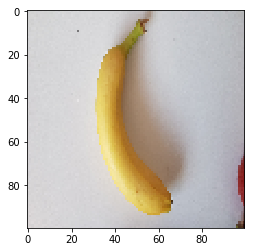

[ 0.  1.]


In [14]:
plt.imshow(test_input)
plt.show()
print(test_class)

In [15]:
from skimage.transform import resize

In [41]:
image = plt.imread('1.jpg')/255

In [42]:
image = resize(image,[100,100])

C:\Users\Vancho\Anaconda\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [43]:
image = np.expand_dims(image,axis=0)

In [45]:
image.shape, image.min(), image.max()

((1, 100, 100, 3), 0.019764705882320922, 1.0)

In [46]:
result = objNeuralNetwork.Predict(image,roundVector=False)

In [47]:
result = objNeuralNetwork.Predict(np.expand_dims(test_input,axis=0),roundVector=False)

In [48]:
result

array([[  1.63665161e-22,   0.00000000e+00,   1.65861179e-11,
          1.58960320e-05,   9.99984145e-01]], dtype=float32)

In [49]:
maxIndex = np.argmax(result)

In [50]:
maxIndex

4

In [51]:
result = np.rint(result)

In [52]:
result

array([[ 0.,  0.,  0.,  0.,  1.]], dtype=float32)

In [53]:
print(result)

[[ 0.  0.  0.  0.  1.]]
